## Part 2 - PCA

##### This application will allow you to decide how many features are enough to build a good model out of the available 11 features. The application will also show how this data can be visualized very effectively although it has 11 features.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
'''Load the dataset and list the columns, (label=quality)'''
uri = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv" # noqa
df = pd.read_csv(uri, sep=';')
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [4]:
'''Check read in data'''

print(f"Red Wine Data Shape: {df.shape}\n\n")
print(f"Red Wine Data:\n{df.head()}")
print(f"\nQuality Classes: \n{df.quality.value_counts()}")

Red Wine Data Shape: (1599, 12)


Red Wine Data:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4     

In [5]:
'''Split into X and y'''
X = df.drop('quality', axis=1) # features
y = df['quality'] # label
print(X.shape, y.shape)

(1599, 11) (1599,)


In [6]:
'''Scale the X (features)'''
scaler = StandardScaler() # create a scaler object
X_scaled = scaler.fit_transform(X) # create a new df out of the existing one, but scaled
print(f"Scaled Features:\n\n{X_scaled}") # Display the scaled DataFrame

Scaled Features:

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


In [7]:
'''Create a PCA Object to explain 100% of the variance'''
pca = PCA(n_components=11, random_state=42) # create a PCA object
principal_components = pca.fit_transform(X_scaled) # fit and transform the scaled features
print(principal_components.shape) # Display the shape of the principal components
print(f"\nExplained variance ratios:\n{pca.explained_variance_ratio_}") # The explained variance is accessible as a method from the PCA object we created

(1599, 11)

Explained variance ratios:
[0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439
 0.05307193 0.03845061 0.0313311  0.01648483 0.00541439]


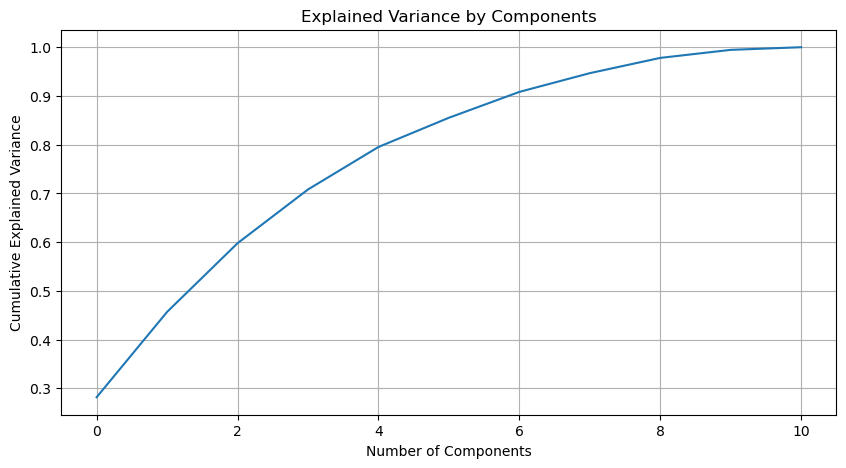

In [8]:
# Explained variance plot red wine
plt.figure(figsize=(10, 5)) # Create a figure
plt.plot(np.cumsum(pca.explained_variance_ratio_)) # Plot the cumulative sum of explained variance ratios
plt.xlabel('Number of Components') # Label the x-axis
plt.ylabel('Cumulative Explained Variance') # Label the y-axis
plt.title('Explained Variance by Components') # Title the plot
plt.grid(True) # Add a grid
plt.show() # Display the plot

##### Based on the graph, it seems that 6 components are enough to explain 90% variance.<br>
##### The following block of code will determine the exact number of components needed to explain 90% variance.<br>

In [12]:
'''Determine how many components you need to explain at least 90% of the variance programatically'''
# Check how many components are there upto the point where explained variance becomes > 0.9
# We use the np.where command for this and it will give us the index of the values > 0.9
# We are interested in the first value in that index list as that is the staring point for values > 0.9
# We add one to that number as the count in python starts from 0

print(np.where(np.cumsum(pca.explained_variance_ratio_) > 0.9)) # This will give us the index of the values > 0.9
print(f"Number of Components which explain the variance in the data upto 90%: {np.where(np.cumsum(pca.explained_variance_ratio_) > 0.9)[0][0]+1}") # This will give us the number of components needed to explain 90% variance, and we get the first index of the array ([0][0]) and then add one to it because that is how we count it in the normal world

(array([ 6,  7,  8,  9, 10]),)
Number of Components which explain the variance in the data upto 90%: 7


##### It matches with the graph as the graph shows just about 6 components required for 90% variance explanation, and since we add one for the program to get 7, it agrees with the graph

In [14]:
'''Take out the first 2 principal components (first 2 columns) and do a K-Means clustering with 6 clusters'''
principal_components_2d = principal_components[:, :2] # Take out the first 2 principal components
kmeans = KMeans(n_clusters=6, random_state=42) # Create a KMeans object
clusters = kmeans.fit(principal_components_2d) # Fit the KMeans object to the data
print(f"These are the n-dimensional coordinates of the 6 centroids:\n{clusters.cluster_centers_}") # gives us the coordinates of the 3 cluster centers (centroids)
print(f"These are the cluster number each data point belongs to:\n\n{clusters.labels_}") # gives us the cluster number each data point belongs to

These are the n-dimensional coordinates of the 6 centroids:
[[ 0.03322115  0.35603645]
 [-1.89835779 -0.19296481]
 [ 3.39196586  1.31821149]
 [-0.02896465  2.21903734]
 [ 0.1611628  -1.58396774]
 [ 2.45499634 -1.09061579]]
These are the cluster number each data point belongs to:

[1 3 0 ... 1 1 0]


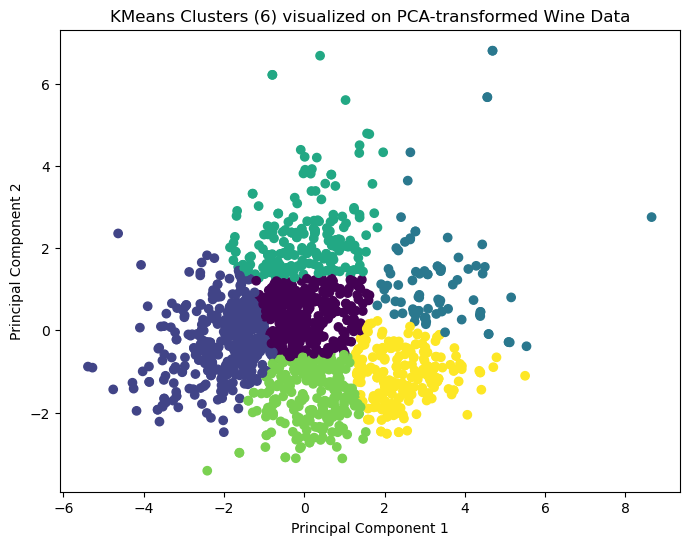

In [15]:
'''Visualize the PCA-transformed data with KMeans labels'''
plt.figure(figsize=(8,6)) # Set the size of the plot
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters.labels_) # Give data points the color of cluster number
plt.xlabel('Principal Component 1') # Label the x-axis
plt.ylabel('Principal Component 2') # Label the y-axis
plt.title('KMeans Clusters (6) visualized on PCA-transformed Wine Data') # Title of the plot
plt.show() # Display the plot

***How many principal components did you need to explain 90% of the varaition?*** <br>
* Ans) 7 principal components

***What did the visualization after doing clustering show you and what did you learn from doing that?***
* Ans) The visualization after clustering showed me that there is a clear seperation between the data points, indicating that I chose the optimal number of clusters. The plot also shows me that the light blue cluster has the most variance since it appears to have the most spread. What I learned from PCA and Kmeans is that they both provide insight into the underlying structure, patterns, and qualities of the classes. This can help us organize the unstructured data into structured data to then perform ML algrithms on that data for predictive purposes.